In [1416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans


In [1417]:
df = pd.read_csv("cars-dataset.csv", na_values = ["?"])

In [1418]:
df.head()


,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [1419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [1420]:
df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [1421]:
df.isna().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [1422]:
df.hp = df.hp.replace(np.nan,'0')

In [1423]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [1424]:
for i in df.columns:
    print(df[i].nunique())

305
5
82
94
351
95
13
129


In [1425]:
df.count()

car name    398
cyl         398
disp        398
hp          398
wt          398
acc         398
yr          398
mpg         398
dtype: int64

In [1426]:
df1 = df.drop('car name',axis=1)

In [1427]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [1428]:
#df1['hp'] = pd.to_numeric(df1['hp'])

In [1429]:
df1['hp'] = df1['hp'].astype(float)

In [1430]:
df1.hp = df1.hp.replace(0,df1.hp.mean())

In [1431]:
df1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

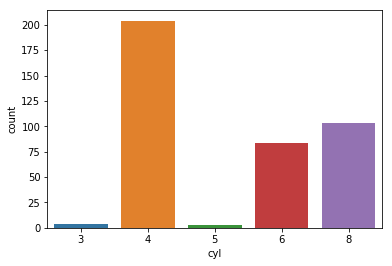

In [1432]:
sns.countplot(df1['cyl'])

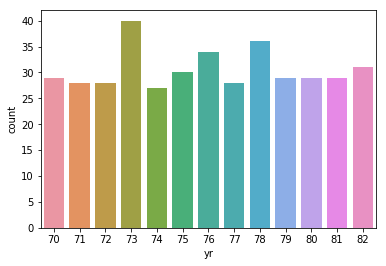

In [1433]:
sns.countplot(df1['yr'])

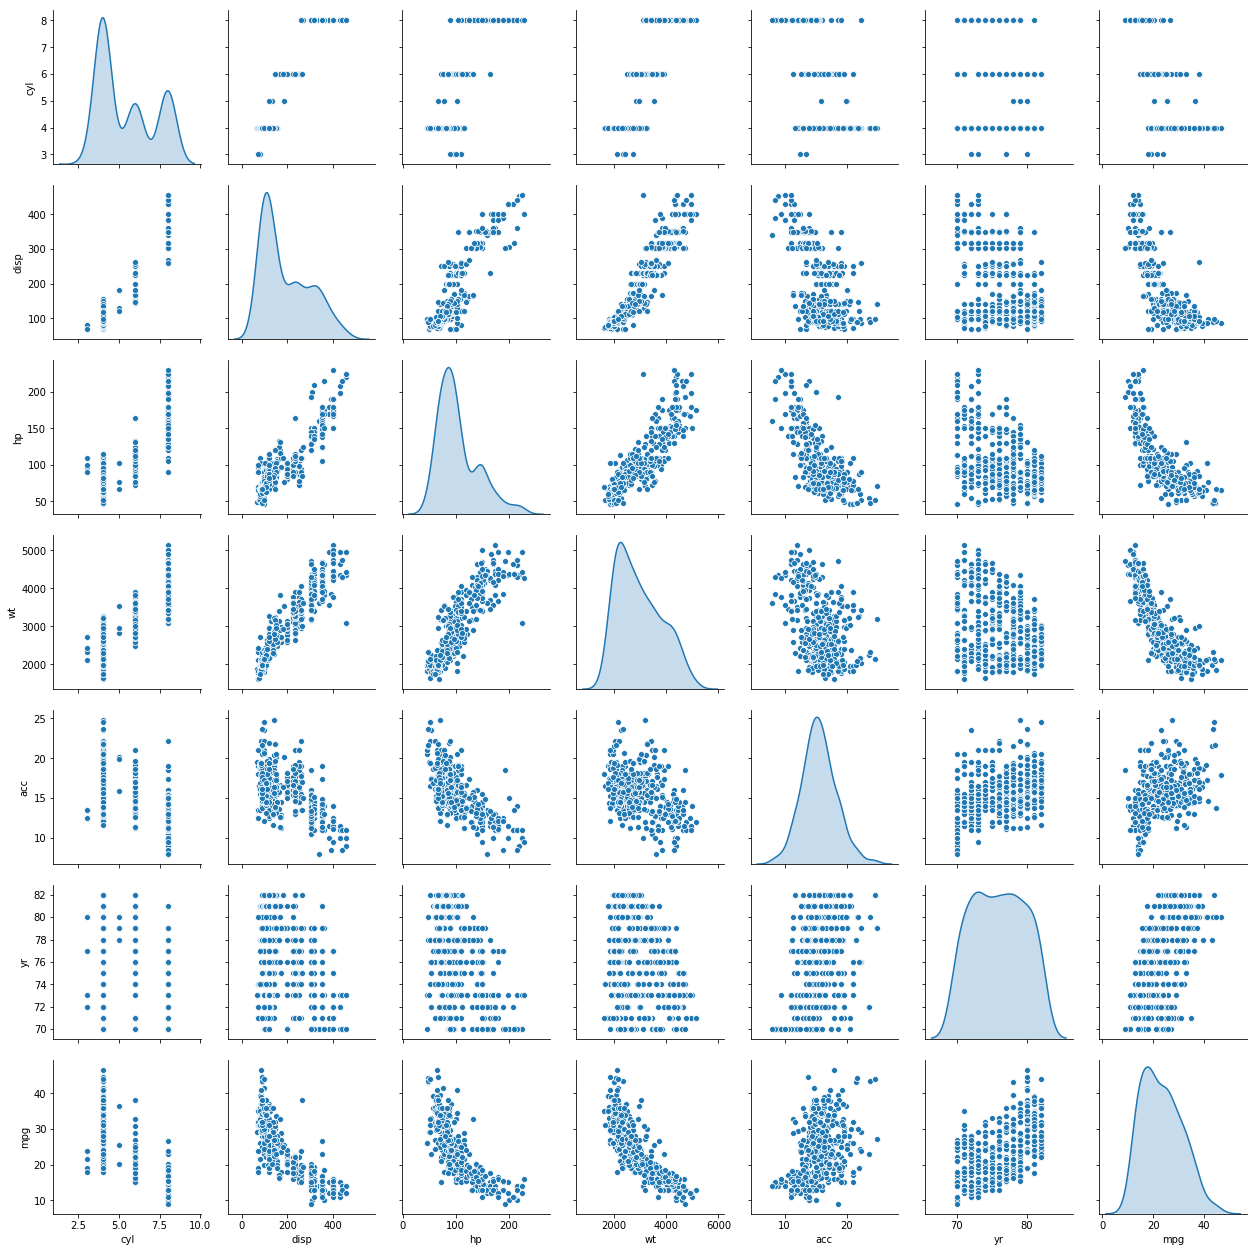

In [1434]:
sns.pairplot(df1,diag_kind='kde')

In [1435]:
#from sklearn.preprocessing import StandardScaler

In [1436]:
#ss = StandardScaler()

In [1437]:
#ss.fit(df1)

In [1438]:
#df1 = ss.transform(df1)

In [1439]:
from scipy.stats import zscore
## scaling all variables
#df1 = df1.apply(zscore)
#df1.shape

In [1440]:
df1.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [1441]:
df2 = df1.copy()

In [1442]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [1443]:
df1.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [1444]:
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,7):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(df1)
    
    #Add cluster information for each record in dataframe
    df1['k_' + str(i)] = km.predict(df1)
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

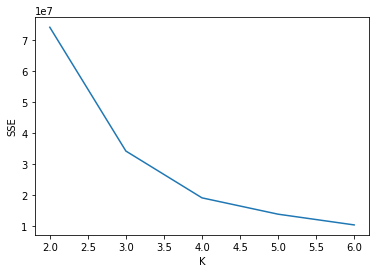

In [1445]:
sns.lineplot(x='K', y='SSE', data=sse_df)

In [1446]:
#Initialize KMeans
km = KMeans(n_clusters=3, n_init=10, max_iter=500, init='k-means++')
#km = KMeans(n_clusters=3, n_init=10, max_iter=500)
#km = KMeans(n_clusters=3)
    #Fit on the data
km.fit(df1[['cyl', 'disp', 'wt','acc','hp','yr','mpg']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1447]:
df2.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [1448]:
df2['clusterLabels'] = km.predict(df2[['cyl', 'disp', 'wt','acc','hp','yr','mpg']])

In [1449]:
df2.sort_values(by=['clusterLabels'], inplace=True)

In [1450]:
df2['clusterLabels'].value_counts()

1    182
2    126
0     90
Name: clusterLabels, dtype: int64

In [1451]:
df2_0 = df2.loc[df2.clusterLabels == 0]

In [1452]:
df2_1 = df2.loc[df2.clusterLabels == 1]

In [1453]:
df2_2 = df2.loc[df2.clusterLabels == 2]

In [1454]:
#df2_3 = df2.loc[df2.clusterLabels == 3]

In [1455]:
df2_1.head()

,cyl,disp,hp,wt,acc,yr,mpg,clusterLabels
181,4,91.0,53.0,1795,17.5,75,33.0,1
180,4,121.0,115.0,2671,13.5,75,25.0,1
347,4,85.0,65.0,1975,19.4,81,37.0,1
348,4,89.0,62.0,2050,17.3,81,37.7,1
349,4,91.0,68.0,1985,16.0,81,34.1,1


In [1456]:
from sklearn.linear_model import LinearRegression

In [1457]:
lr = LinearRegression()

In [1458]:
from sklearn.metrics import r2_score
#model0
X = df2_0.drop(['mpg','clusterLabels'],axis=1)
y = df2_0.mpg
print(X.shape)
    
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=0)
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print(r2_score(ytest,ypred))
print(lr.score(xtest,ytest))

(90, 6)
0.6692324980398079
0.669232498039808


In [1459]:
lr.coef_

array([-0.21426796,  0.02394669, -0.01000851, -0.00360236,  0.31814089,
        0.41359643])

In [1460]:
#model1
X = df2_1.drop(['mpg','clusterLabels'],axis=1)
y = df2_1.mpg
print(X.shape)
    
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=0)
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print(r2_score(ytest,ypred))
print(lr.score(xtest,ytest))

(182, 6)
0.6474593947689555
0.6474593947689555


In [1461]:
lr.coef_

array([ 2.19565762, -0.04723388, -0.06121856, -0.00510617,  0.04372936,
        0.93040152])

In [1462]:
#model2
X = df2_2.drop(['mpg','clusterLabels'],axis=1)
y = df2_2.mpg
print(X.shape)
    
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=0)
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
print(r2_score(ytest,ypred))
print(lr.score(xtest,ytest))

(126, 6)
0.4908413490500051
0.4908413490500051


In [1463]:
lr.coef_

array([ 0.47897354, -0.02394839, -0.01893415, -0.00327139,  0.05998209,
        0.49308703])